<a href="https://colab.research.google.com/github/ReneSRuiz/Mineria_de_datos/blob/main/T%C3%A9cnia_Miner%C3%ADa_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equipo:** 11  
**Grupo:** 001  
**Frecuencia:** lunes  
**Integrantes:**

 *   García Alanís Alejandro Uriel 1886968
 *   Estrada Dávila Jorge Eduardo 1741943
 *   Paz Reyes Néstor Misael 1559508
 *   González García Elisa 1858207
 *   Sobrevilla Ruiz Rene 1941452  

Con ayuda de la segunda entrega del PIA (https://github.com/ReneSRuiz/Mineria_de_datos/blob/main/AvancePIA_II_001_11.ipynb), se supo recuperar información valiosa que responde a la mayoría de nuestros objetivos secundarios, además de dar las pautas para nuestro objetivo principal. El equipo decidió solamente manipular la tabla y usar un parámetro para evaluar cada jugada y, con ayuda de gráficas, mostrar los resultados. Sin embargo, nuestro último objetivo secundario consta de encontrar una manera de clasificar a los jugadores dependiendo del tipo del tipo de "elo" que se tenga. Como primera opción usaremos una regresión lineal para predecir el "Elo" de los jugadores dependiendo de la cantidad de errores que estos cometen. En caso de que no salga como esperamos, utilizaremos un árbol de desición que nos ayude a clasificar a los jugadores (ya sea de "Low rating", "High rating" o "GM rating") dependiendo de los errores. Para esto, usaremos la base de datos modificados que mostramos en el avance del PIA número 2, y los manipularemos para aplicar estas técnicas.

In [16]:
#importando las librerias
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carga de los datos
from google.colab import files
files.upload()
df = pd.read_csv("Base_Principal_Modificada.csv")

Saving Base_Principal_Modificada.csv to Base_Principal_Modificada.csv


**Regresión Lineal**  
Antes de pasar a la regresión lineal, ajustaremos los datos:

In [3]:
#Crear columnas de blancas
Blancas=df.drop({'Apertura','Categoria_Blancas','Resultado','Terminacion','BlackElo','Tipo_juego','Movimientos','Categoria_Negras','Negras_Metedura_de_patas',
                  'Negras_Errores','Negras_Imprecision'}, axis = 1)
#Cambiaremos los nombres
Blancas=Blancas.rename(columns = {'WhiteElo':'Elo','Blancas_Errores':'Errores','Blancas_Imprecision':'Imprecisiones',
                                  'Blancas_Metedura_de_patas':'Meteduras_de_pata'})
Blancas
#Crear columnas de negras
Negras=df.drop({'Apertura','Categoria_Negras','Resultado','Terminacion','Categoria_Blancas','Tipo_juego','Movimientos','WhiteElo','Blancas_Metedura_de_patas',
                  'Blancas_Errores','Blancas_Imprecision'}, axis = 1)
#Cambiaremos los nombres
Negras=Blancas.rename(columns = {'BlackElo':'Elo','Negras_Errores':'Errores','Negras_Imprecision':'Imprecisiones',
                                  'Negras_Metedura_de_patas':'Meteduras_de_pata'})
df2=Blancas.append(Negras)
df2.head(5)

,Elo,Meteduras_de_pata,Errores,Imprecisiones
0,1180,2,3,1
1,1381,1,1,5
2,1485,1,2,8
3,2040,2,5,4
4,2163,0,1,2


In [6]:
x = df2[['Meteduras_de_pata','Errores','Imprecisiones']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.04711916464757204


El modelo lineal múltiple con las 3 variables solamente puede representas menos del 5% de los datos, por lo que  es realmente un mal modelo. Veremos si se puede crear este modelo lineal con 2 variables o solamente 1.

In [7]:
x = df2[['Meteduras_de_pata','Imprecisiones']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.045956844051309065


In [8]:
x = df2[['Errores','Imprecisiones']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.004148524520065977


In [9]:
x = df2[['Meteduras_de_pata','Errores']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.041698384152699


In [10]:
x = df2[['Imprecisiones']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.0035512168093041474


In [11]:
x = df2[['Errores']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  9.581647028067408e-05


In [12]:
x = df2[['Meteduras_de_pata']]
y = df2['Elo']
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(x,y,test_size=0.2)
Modelo = linear_model.LinearRegression()
Modelo.fit(x_entrenamiento,y_entrenamiento)
y_prediccion = Modelo.predict(x_entrenamiento)
coeficientes = Modelo.coef_
intercepto = Modelo.intercept_
print("R cuadrada: ", Modelo.score(x_entrenamiento,y_entrenamiento))

R cuadrada:  0.03921035910616588


Vemos que usando regresión lineal, nuestras R cuadradas son demasiado bajas, por lo que es el "Elo" de los jugadores no es posible predecirlo mediante los errores de los jugadores.

**Arbol de decisión**  
Antes de usar esta técnica, ajustaremos los datos:

In [13]:
#Crear columnas de blancas
Blancas=df.drop({'Apertura','WhiteElo','Resultado','Terminacion','BlackElo','Tipo_juego','Movimientos','Categoria_Negras','Negras_Metedura_de_patas',
                  'Negras_Errores','Negras_Imprecision'}, axis = 1)
#Cambiaremos los nombres
Blancas=Blancas.rename(columns = {'Categoria_Blancas':'Categoria','Blancas_Errores':'Errores','Blancas_Imprecision':'Imprecisiones',
                                  'Blancas_Metedura_de_patas':'Meteduras_de_pata'})
Blancas
#Crear columnas de negras
Negras=df.drop({'Apertura','BlackElo','Resultado','Terminacion','Categoria_Blancas','Tipo_juego','Movimientos','WhiteElo','Blancas_Metedura_de_patas',
                  'Blancas_Errores','Blancas_Imprecision'}, axis = 1)
#Cambiaremos los nombres
Negras=Blancas.rename(columns = {'Categoria_Negras':'Categoria','Negras_Errores':'Errores','Negras_Imprecision':'Imprecisiones',
                                  'Negras_Metedura_de_patas':'Meteduras_de_pata'})
df3=Blancas.append(Negras)
df3.head(5)

,Categoria,Meteduras_de_pata,Errores,Imprecisiones
0,Low rating,2,3,1
1,Low rating,1,1,5
2,Low rating,1,2,8
3,High rating,2,5,4
4,High rating,0,1,2


Con esta tabla, trataremos de ver si podemos crear un árbol de desición que pueda clasificar a los jugadores:

In [ ]:
predictors = df3[['Meteduras_de_pata','Errores','Imprecisiones']]
targets = df3['Categoria']
predictors_labels = ['Meteduras_de_pata','Errores','Imprecisiones']
targets_labels = df3['Categoria'].unique()
x_entrenamiento,x_test,y_entrenamiento,y_test=train_test_split(predictors,targets)
arbol=DecisionTreeClassifier()
arbol.fit(x_entrenamiento,y_entrenamiento)
export_graphviz(arbol,out_file='arbol.dot',class_names=targets_labels,feature_names=predictors_labels,impurity=False, filled=True)
with open('arbol.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)
#En el github no se mostrará el árbol de decisión por lo pesado del mismo

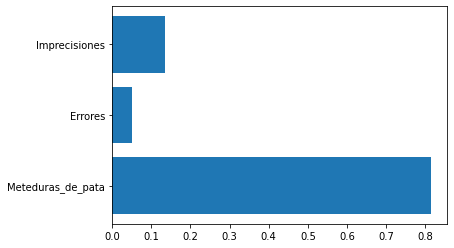

In [17]:
caract=3
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),predictors_labels)
plt.show()

In [18]:
arbol.score(x_test,y_test)

0.8008465444355612

In [19]:
arbol.score(x_entrenamiento,y_entrenamiento)

0.8003452134214329

In [32]:
arbol.tree_.max_depth

24

Vemos que el arbol de decisión clasifica a los jugadores dependiendo de su clase, es decir, si son "Low", "High" o "GM", este tiene una efectividad del 80% según las pruebas, 24 niveles de profundidad y la característica que más relevancia tiene son las metedura de pata. El problema es que el tamaño del árbol es realmente grande, y puede que esté sesgado por la gran cantidad de jugadores en "Low rating" o por el hecho de que solamente el 1% de los jugadores es "GM rating", alargando más el arbol y haciéndolo menos específico. Lo que se podría hacer es crear nuestra propia clasificación podría ayudar a que este sea un poco mas exacto y preciso a la hora de querer clasificar a algún jugador.